#Porfilio Trujillo Martinez

### Taller 5

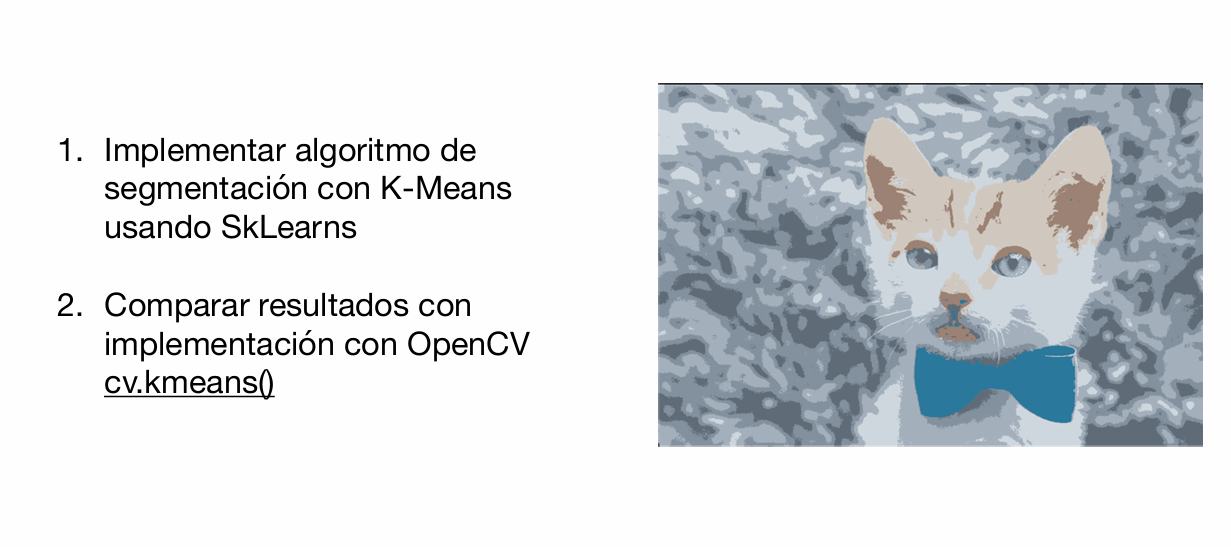

###Importar librerias

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Cargar imagen

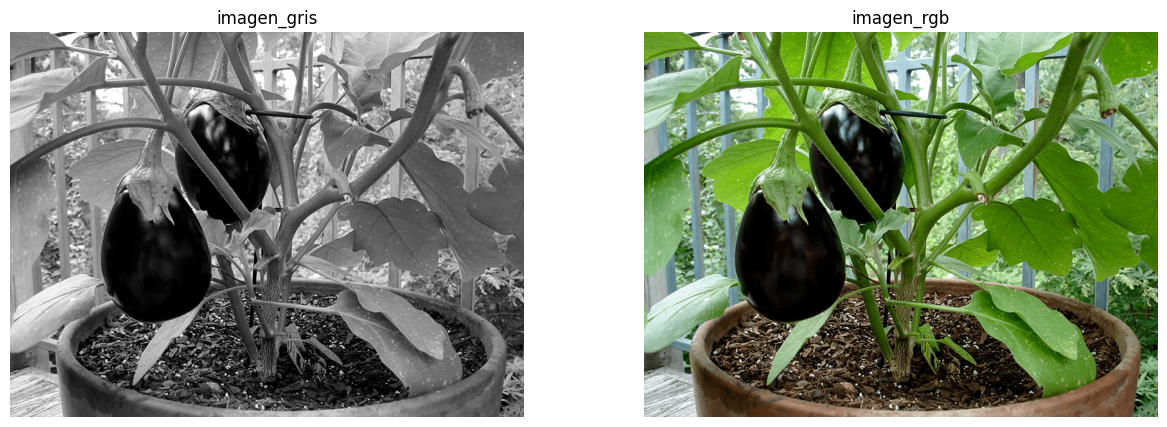

In [12]:
imagen_original = "/content/drive/MyDrive/Clase Visión Computo/Slides/5-slides/berenjenas.png"
imagen = cv2.imread(imagen_original)
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 2)
plt.imshow(imagen_rgb)
plt.title('imagen_rgb')
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title('imagen_gris')
plt.axis('off')

plt.show()


## 1. K-Means usando SkLearns

### 1.1  Usando la imagen gris

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


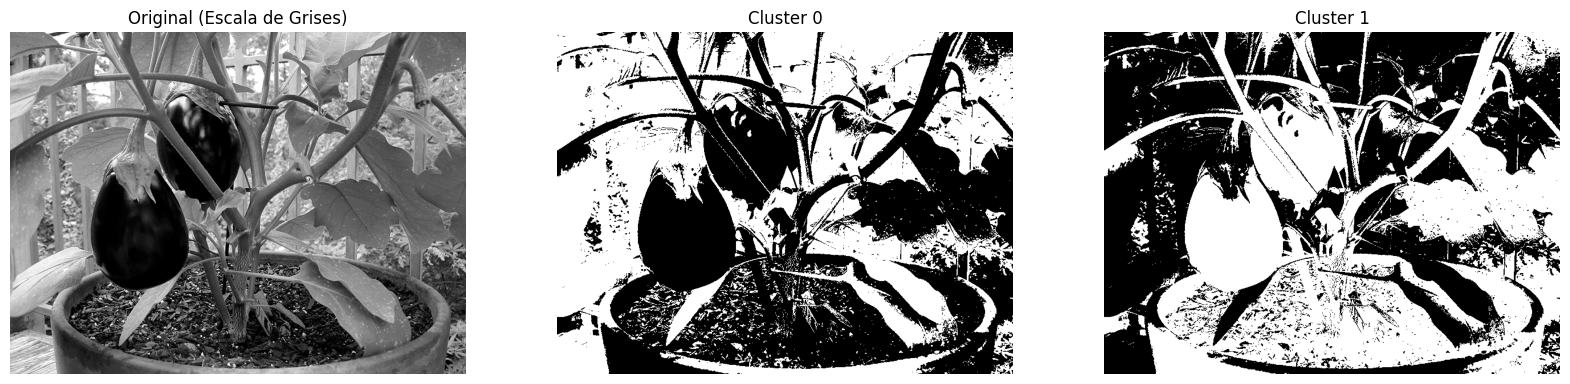

In [13]:
# Convertir la imagen en un array 2D de tipo float32
pixeles = imagen_gris.reshape((-1, 1))  # Solo 1 canal para imágenes en escala de grises

# Aplicar K-Means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
etiquetas = kmeans.fit_predict(pixeles)
centroides = kmeans.cluster_centers_

# Revertir la forma del array de etiquetas a la forma de la imagen original
etiquetas = etiquetas.reshape(imagen_gris.shape)

# Mostrar la imagen original y las imágenes de cada cluster
plt.figure(figsize=(20, 10))

# Imagen original en escala de grises
plt.subplot(1, num_clusters+1, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Original (Escala de Grises)')
plt.axis('off')

# Imágenes de los clusters
for i in range(num_clusters):
    cluster_imagen = np.zeros_like(imagen_gris)
    cluster_imagen[etiquetas == i] = centroides[i]
    plt.subplot(1, num_clusters+1, i+2)
    plt.imshow(cluster_imagen, cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.show()


###1.2. Usando la imagen RGB

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


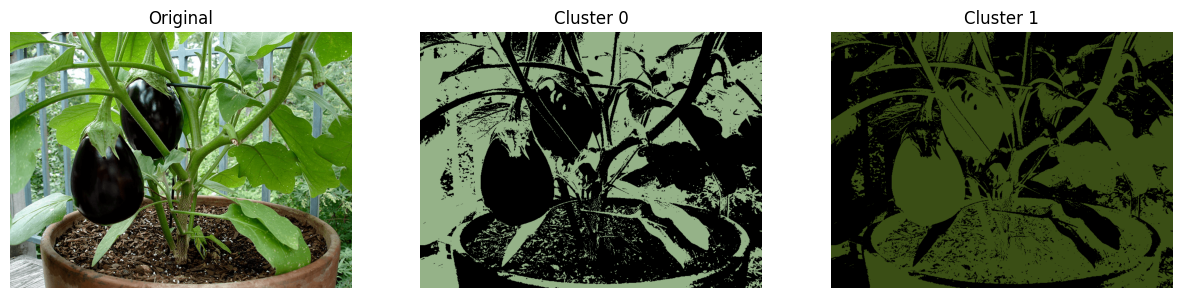

In [14]:
# Convertir la imagen en un array 2D de tipo float32
pixeles = imagen_rgb.reshape((-1, 3))

# Aplicar K-Means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
etiquetas = kmeans.fit_predict(pixeles)
centroides = kmeans.cluster_centers_

# Revertir la forma del array de etiquetas a la forma de la imagen original
etiquetas = etiquetas.reshape(imagen_rgb.shape[0], imagen_rgb.shape[1])

# Mostrar la imagen original y las imágenes de cada cluster
plt.figure(figsize=(15, 7))

# Imagen original
plt.subplot(1, num_clusters+1, 1)
plt.imshow(imagen_rgb)
plt.title('Original')
plt.axis('off')

# Imágenes de los clusters
for i in range(num_clusters):
    cluster_imagen = np.zeros_like(imagen_rgb)
    cluster_imagen[etiquetas == i] = centroides[i]
    plt.subplot(1, num_clusters+1, i+2)
    plt.imshow(cluster_imagen)
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.show()


##2. cv.kmeans() con OpenCV

###2.1 Usando la imagen gris

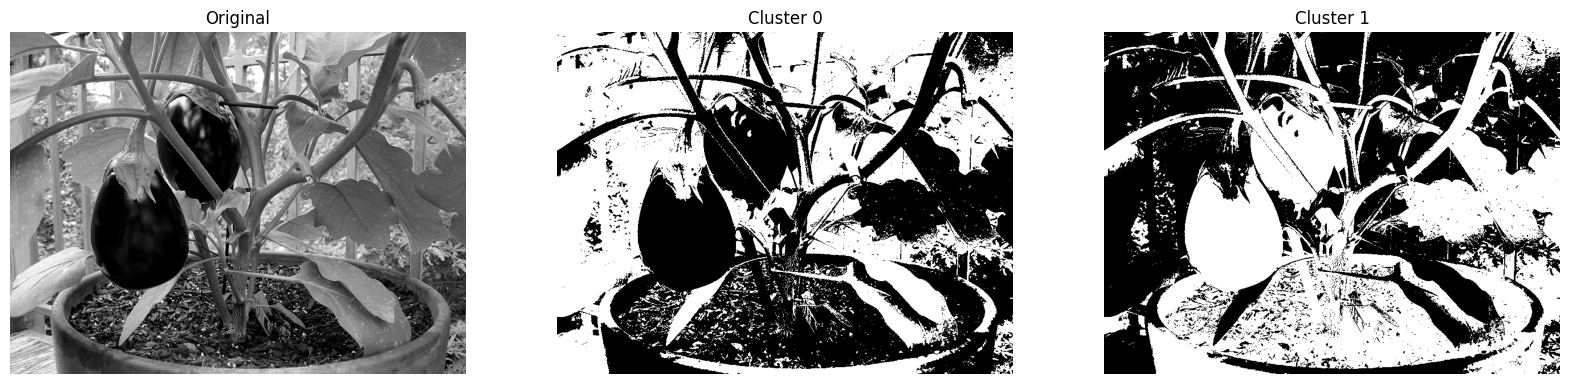

In [18]:
# Convertir la imagen en un array 2D de tipo float32
pixeles = imagen_gris.reshape((-1, 1))
pixeles = np.float32(pixeles)

# Definir los criterios para K-Means
criterios = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Aplicar K-Means
num_clusters = 2
_, etiquetas, centroides = cv2.kmeans(pixeles,
                            num_clusters, None,
                            criterios, 10,
                            cv2.KMEANS_RANDOM_CENTERS)

# Convertir los centroides a tipo uint8
centroides = np.uint8(centroides)

# Revertir la forma del array de etiquetas a la forma de la imagen original
etiquetas = etiquetas.reshape(imagen_gris.shape[0], imagen_gris.shape[1])

# Mostrar la imagen original y las imágenes de cada cluster
plt.figure(figsize=(20, 10))

# Imagen original
plt.subplot(1, num_clusters+1, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Original')
plt.axis('off')

# Imágenes de los clusters
for i in range(num_clusters):
    cluster_imagen = np.zeros_like(imagen_gris)
    cluster_imagen[etiquetas == i] = centroides[i]
    plt.subplot(1, num_clusters+1, i+2)
    plt.imshow(cluster_imagen, cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.show()


###2.2 Usando la imagen RGB

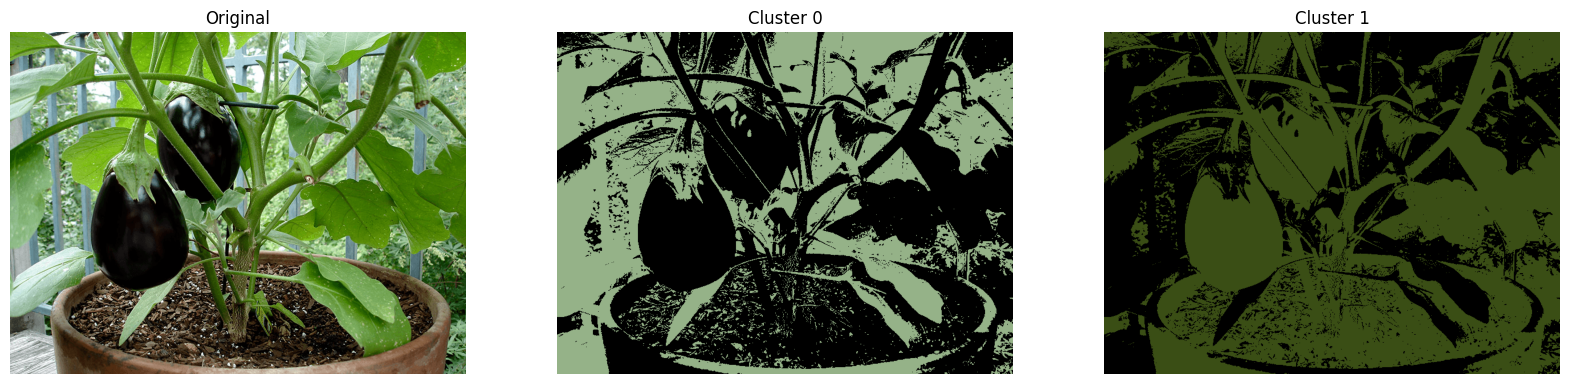

In [15]:
# Convertir la imagen en un array 2D de tipo float32
pixeles = imagen_rgb.reshape((-1, 3))
pixeles = np.float32(pixeles)

# Definir los criterios para K-Means
criterios = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Aplicar K-Means
num_clusters = 2
_, etiquetas, centroides = cv2.kmeans(pixeles,
                            num_clusters, None,
                            criterios, 10,
                            cv2.KMEANS_RANDOM_CENTERS)

# Convertir los centroides a tipo uint8
centroides = np.uint8(centroides)

# Revertir la forma del array de etiquetas a la forma de la imagen original
etiquetas = etiquetas.reshape(imagen_rgb.shape[0], imagen_rgb.shape[1])

# Mostrar la imagen original y las imágenes de cada cluster
plt.figure(figsize=(20, 10))

# Imagen original
plt.subplot(1, num_clusters+1, 1)
plt.imshow(imagen_rgb)
plt.title('Original')
plt.axis('off')

# Imágenes de los clusters
for i in range(num_clusters):
    cluster_imagen = np.zeros_like(imagen_rgb)
    cluster_imagen[etiquetas == i] = centroides[i]
    plt.subplot(1, num_clusters+1, i+2)
    plt.imshow(cluster_imagen)
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.show()


###Análisis

Se observa que al aplicar el algoritmo K-Means tanto a imágenes RGB como a imágenes en escala de grises, no se aprecian cambios significativos en los resultados, ya sea utilizando la implementación de K-Means de scikit-learn o la función cv.kmeans() de OpenCV.